# Логистическая регрессия
Логистическая регрессия, как и линейная регрессия, имеет линейную зависимость между предикторами и целевой переменной. Разница заключается в том, что логистическая регрессия используется для классификации.
Более того, в основе логистической регрессии лежит функция линейной регрессии, которую мы преобразовали с помощью функции логистического отклика. Но давайте обо всем по порядку.

In [1]:
# импортируем библиотеки
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_regression, make_classification
from sklearn.metrics import  accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Линейная регрессия
В линейной регрессии значение целевой переменной определяется функцией: $f(w, X) = X\vec{w} $

Функция потерь: $Q(X, \vec{w}, \vec{y}) = \frac{1}{N}(X \vec{w} - \vec{y})^2 \rightarrow min$

Для поиска оптимальных значений весов используется метод градиентного спуска или аналитическое решение.

Градиент: $\nabla Q = \frac{2}{N}X^T(X\vec{w} - \vec{y})$

Градиентный спуск: $\vec{w} = \vec{w} - \eta \nabla Q$

Аналитическое решение $\vec{w} = (X^TX)^{-1}X^T\vec{y}$

, где $X$ — пространство признаков, $\vec{w}$ — вектор весов, $\vec{y}$ — вектор целевой значений, $N$ — количество наблюдений, $\eta$ — шаг градиентного спуска

In [2]:
# определим количество наблюдений и признаков
samples = 2000
features = 4
x = np.random.seed()

In [3]:
# создадим пространство признаков и значения целевой переменной
X, y = make_regression(n_samples=samples, n_features=features, noise=.05)

In [4]:
# добавим первую колонку с единицами в X, что упростит поиск градиента
# w0*1 + w1*x1...
X = np.hstack((np.ones((X.shape[0], 1)), X))
y = y.reshape(len(y), 1)

In [5]:
# создадим функцию градиентного спуска
def linear_gradient_descent(X, y, w, eta=0.1, max_iter=10):
    mse_hist = []
    for _ in range(max_iter):
        # предскажем значение целевой переменной
        y_pred = np.dot(X, w)
        # найдем значение функции потерь
        mse = np.mean((y - y_pred)**2)
        mse_hist.append(mse)
        # найдем градиент
        delta_w =  2 * np.dot(X.T, (np.dot(X, w)-y)) / len(X)
        # обновим значения весов
        w -= eta * delta_w
    return y_pred, mse_hist

mse:  0.0024947631878716107


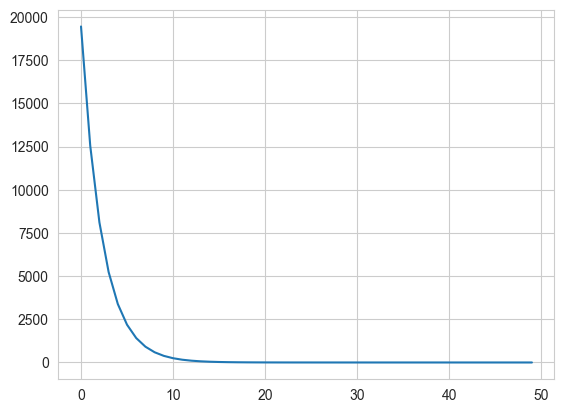

In [6]:
# зададим константные значения весов
w = np.ones((X.shape[1], 1))
y_pred, mse_hist = linear_gradient_descent(X, y, w, max_iter=50)
print('mse: ', mse_hist[-1])
plt.plot(mse_hist)
plt.show()

In [7]:
# сравним истинное значение целевой переменной и предикт
compare = np.hstack((y, y_pred))
pd.DataFrame(compare).head(5)

,0,1
0,-51.265879,-51.355656
1,176.613322,176.664208
2,74.220485,74.237759
3,-49.459175,-49.463704
4,34.156935,34.173793


In [8]:
# найдем веса с помощью аналитического решения и сравним их
# со значениями полученными с помощью градиентного спуска
XtX = np.dot(X.T, X)
XtX_inv = np.linalg.inv(XtX)
XtX_invXt = np.dot(XtX_inv, X.T)
w_as = np.dot(XtX_invXt, y)
pd.DataFrame(np.hstack((w, w_as))).head(5)

,0,1
0,0.000390,0.000206
1,57.783908,57.784848
2,57.457885,57.459133
3,93.526907,93.528095
4,70.601965,70.604126


## Логистическая регрессия
Для лучшего понимания логистической регрессии предлагаю начать с конца, а именно предположим, что нам известны веса коэффициентов $w$.
Воспользуемся готовым методом LogisticRegression из библиотеки scikit-learn, чтобы их найти. Ну а для пущего интереса разделим наш датасет на тренировочную и тестовые подвыборки, первая для обучения, вторая для проверки.

In [23]:
# определим количество наблюдений и признаков
samples = 400
features = 2

In [24]:
# сгенерируем датасет и выборки
X, y = make_classification(n_samples=samples, n_features=features, n_redundant=0, n_repeated=0)
# сразу добавим первой колонкой 1, чтобы в дальнейшем было удобнее работать со свободным членом
X = np.hstack((np.ones((X.shape[0], 1)), X))
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.6, stratify=y)
X[:5]

array([[ 1.        , -0.35664237,  1.55503468],
       [ 1.        ,  1.43863799,  0.79566278],
       [ 1.        ,  1.57122419,  0.92055053],
       [ 1.        ,  0.96227072, -0.44290115],
       [ 1.        , -0.87460215, -0.80427533]])

In [25]:
# найдем вектор весов
clf = LogisticRegression()
clf.fit(X_train, y_train)
w = clf.coef_.T
w

array([[1.72814748e-06],
       [2.87832533e+00],
       [5.90463765e-01]])

In [26]:
Xy = np.hstack((X_test, y_test.reshape(len(y_test), 1)))
Xy[:5]

array([[ 1.        ,  0.56072651,  1.12409955,  1.        ],
       [ 1.        , -0.89827735, -0.23740469,  0.        ],
       [ 1.        ,  1.06429768,  0.34287393,  1.        ],
       [ 1.        ,  2.378183  ,  0.45276853,  1.        ],
       [ 1.        , -1.75882258,  1.78515626,  0.        ]])

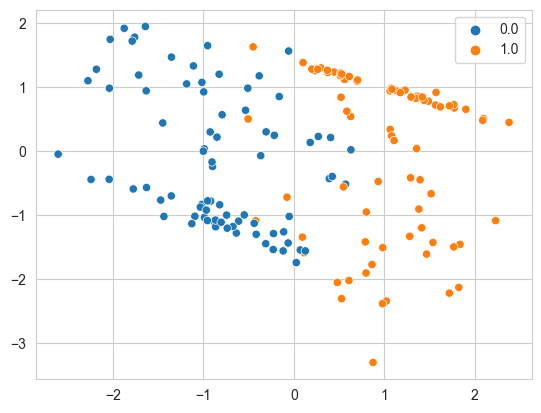

In [27]:
# построим график истинной принадлежности наблюдений тестовой выборки к классам
sns.scatterplot(Xy[:, 1:3], x=Xy[:, 1], y=Xy[:, 2], hue=Xy[:, 3])
plt.show()

Пространство признаков можно разделить на две области: точки принадлежащие к 0 классу и точки принадлежащие к 1 классу.
Разделяющая плоскость называется линейным дискриминантом, так как она является линейной с точки зрения своей функции,
и позволяет модели производить разделение, дискриминацию точек на различные классы.

Подставив координаты любой случайно точки M(x1, x2) в функцию линейной регрессии $f(w,x_i) = w_0 + w_1x_{i1} + w_2x_{i2}$,
мы можем получить три возможных варианта:
1. Точка относиться к 1 классу, значение функции будет принадлежать $(0, +\infty)$
2. Точка относиться к 0 классу, значение функции будет принадлежать $(0, -\infty)$
3. Точка лежит на прямой, значение функции равно 0

Давайте проверим:

In [28]:
# возьмем случайным образом по одной точке, принадлежащих к 0 и 1 классам
plus_sample = Xy[Xy[:, 3] == 1][2]
minus_sample = Xy[Xy[:, 3] == 0][1]
print(list(plus_sample))
print(list(minus_sample))

[1.0, 2.378182996381428, 0.45276853286557117, 1.0]
[1.0, -1.7588225808704083, 1.785156256438462, 0.0]


In [29]:
# найдем значения функции линейной регрессии для каждой точки
plus_sample_f_value = np.dot(plus_sample[:3], w)
minus_sample_f_value = np.dot(minus_sample[:3], w)
print(plus_sample_f_value)
print(minus_sample_f_value)

[7.11252949]
[-4.00839176]


### Шансы odds
Благодаря функции $f(w,x_i) = w_0 + w_1x_{i1} + w_2x_{i2}$ мы можем найти шансы принадлежности к классам.
$odds_+ = e^{\vec{w}^T\vec{x}}$
Теперь нам нужно вероятность. Преобразуем функцию $f(w,x_i) = w_0 + w_1x_{i1} + w_2x_{i2}$, значения которой лежат в диапазоне $(-\infty,+\infty)$ на функцию, значения которой будут лежать в диапазоне $[0,1]$. И такая функция существует, ее называют функцией логистического отклика или обратного-логит преобразования (также известная, как sigmoid-функция):

$\sigma(\vec{w}^T \vec{x_i}) = \frac{1}{1+e^{-\vec{w}^T \vec{x_i}}}$

Посмотрим по шагам как получается функция логистического отклика. Отметим, что шагать мы будем в обратную сторону, т.е. мы предположим, что нам известно значение вероятности, которое лежит в пределах от $0$ до $1$ и далее мы будем «раскручивать» это значение на всю область чисел от $-\infty$ до $+\infty$.

In [30]:
# найдем вероятность принадлежности к 1 классу 1 наблюдения в тестовой выборке
# алгоритм поиска детально разберем позднее
z = np.dot(X_test, w)
y_proba = 1/(1 + np.exp(-z))
sample_proba = y_proba[1]
print(sample_proba)

[0.06147311]


Также шансы можно найти зная вероятность
Уравнение шанса наступления события $(odds_+)$:
$odds_+ = \frac{p_+}{1-p_+}$

или

$odds_+ = e^{f(w,x_i)} = e^{\vec{w}^T\vec{x}}$

In [31]:
sample_odds = sample_proba / (1 - sample_proba)
print(sample_odds)

[0.06549958]


Переведем значения вероятности в диапазон $(-\infty,+\infty)$. Для этого прологарифмируем шансы по основанию числа Эйлера $e$ и получим:

$f(w,x_i)=\vec{w}^T\vec{x}=ln(odds_+)$

In [32]:
# и заодно проверим получившийся результат
f_x_i = np.log(sample_odds)
print(f_x_i)
print(np.dot(X_test[1], w))

[-2.72571159]
[-2.72571159]


Зная шансы, мы можем найти вероятность:

$p_+ = \frac{odds_+}{1+odds_+} $

или

$p_+ = \frac{e^{\vec{w}^T\vec{x}}}{1+e^{\vec{w}^T\vec{x}}}$

Разделив числитель и знаменатель на $e^{\vec{w}^T\vec{x}}$ мы получим:

$p_+ = \frac{1}{1+e^{-\vec{w}^T\vec{x}}} = \sigma(\vec{w}^T\vec{x})$

И так мы получили функцию логистического отклика. Давайте проверим на практическом примере

In [33]:
# найдем скалярное произведение матрицы X и вектора y
z = np.dot(X_test, w)
# создадим переменную с числом Эйлера
e = np.e
# найдем вероятности принадлежности точек к 1 классу
first_class_proba = 1.0/(1+ e**-z)
# преобразуем вероятность в класс
y_pred = np.where(first_class_proba >= 0.5, 1, 0)

In [34]:
Xy_class = np.hstack((Xy, y_pred))

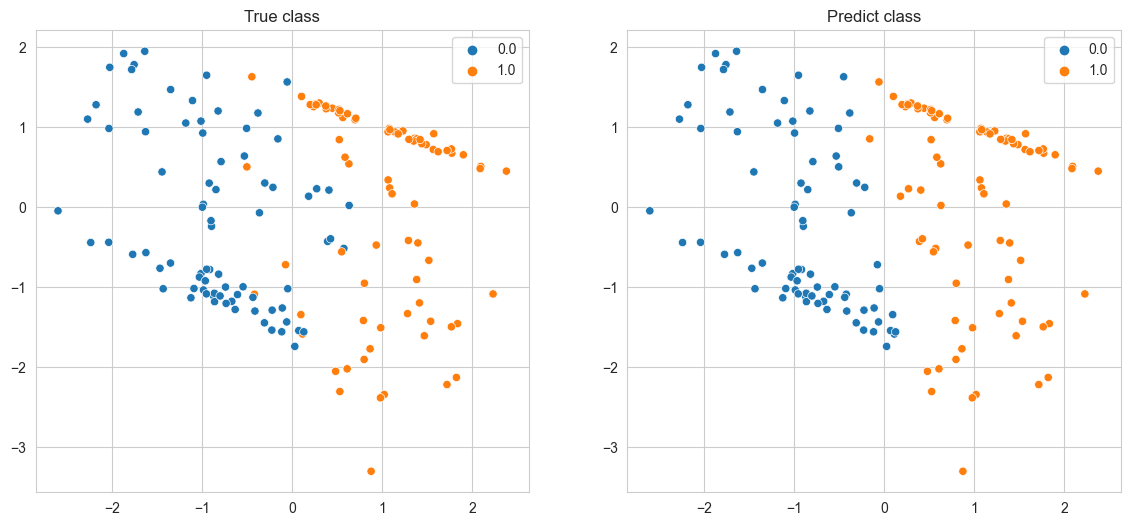

In [35]:
# сравним истинную и предсказанную принадлежность к классам
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14, 6))
ax1.set_title('True class')
sns.scatterplot(Xy_class[:, 1:4], x=Xy_class[:, 1], y=Xy_class[:, 2], hue=Xy_class[:, 3], ax=ax1)
ax2.set_title('Predict class')
sns.scatterplot(Xy_class[:, 1:4], x=Xy_class[:, 1], y=Xy_class[:, 2], hue=Xy_class[:, 4], ax=ax2)
plt.show()

Весьма неплохо! Мы разбирали пример при условии, что нам известен вектор весов признаков. В реальных задачах машинного обучения,
напротив стоит задача найти веса. Для ее решения нам поможет метод градиентного спуска.

### Функция максимального правдоподобия

Это задача оптимизации, в которой для начала нам требуется найти производную от функции правдоподобия по вектору весов.
$P(\vec{y}|\sigma(\vec{w}^T X)) = \prod_{i=1}^n \sigma(\vec{w}^T \vec{x_i})^{y_{i}} (1 - \sigma(\vec{w}^T \vec{x_i})^{(1-y_{i})} \rightarrow max $

Однако предварительно имеет смысл упростить себе задачу: производную будем искать от логарифма функции правдоподобия. Почему после логарифмирования, в функции логистической ошибки, мы поменяли знак с + на -. Все просто, так как в задачах оценки качества модели принято минимизировать значение функции, то мы умножили правую часть выражения на  -, и соответственно вместо максимизации, теперь минимизируем функцию.

Собственно, сейчас, на ваших глазах была много страдальчески выведена функция потерь — Logistic Loss для обучающей выборки с двумя классами.

$L_{log}(X,\vec{y},\vec{w}) = - \sum\limits_{i=1}^n(y_i  log_e \sigma(\vec{w}^T \vec{x_i}) + (1-y_i)  log_e(1 - \sigma(\vec{w}^T \vec{x_i})) ) \rightarrow min$

Найдем градиент: $\nabla Q = \frac{1}{N}X^T(\sigma(\vec{w}^T\vec{x}) - \vec{y})$

Уравнение градиентного спуска: $\vec{w} = \vec{w} -  \eta \nabla Q$

, где $X$ — пространство признаков, $\vec{w}$ — вектор весов, $\vec{y}$ — вектор целевой значений, $N$ — количество наблюдений, $\eta$ — шаг градиентного спуска, $\sigma(\vec{w}^T\vec{x})$ — вероятность принадлежности к положительной классу, полученная с помощью функции логит преобразования:

$p_+ = \frac{1}{1+e^{-\vec{w}^T\vec{x}}} = \sigma(\vec{w}^T\vec{x})$

In [36]:
# на вход функция градиентного спуска получает:
# пространство признаков X, векторы истинных значений и весов: y, w, шаг обучения и количество циклов
def logistic_gradient_descent(X, y, w, eta=0.1, max_iter=10):
    cost_hist = []
    for _ in range(max_iter):
        # найдем значения функции линейной регрессии
        z = np.dot(X, w)
        # выполним логит преобразования, чтобы получить вероятность
        y_proba = 1.0/(1+ np.exp(-z))
        # посчитаем потери
        cost = np.mean(-y * np.log(y_proba) - (1 - y) * np.log(1 - y_proba))
        cost_hist.append(cost)
        # найдем значения градиента
        delta_w = np.dot(X.T, (y_proba - y)) / len(X)
        # обновим вектор весов с помощью градиентного спуска
        w -= eta * delta_w
    return y_proba, cost_hist

cost_hist:  0.3058386581506126


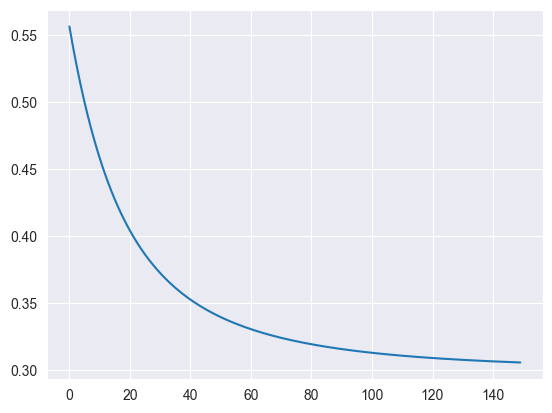

In [24]:
w = np.ones((X.shape[1], 1))
y_test = y_test.reshape(len(y_test), 1)
y_proba, cost_hist = logistic_gradient_descent(X_test, y_test, w, eta=0.1, max_iter=150)
print('cost_hist: ', cost_hist[-1])
plt.plot(cost_hist[0:])
plt.show()

In [25]:
# преобразуем вероятность в классы
y_pred = np.where(y_proba >= 0.5, 1, 0)

In [27]:
# сравним истинные и предсказанные значения
compare = np.hstack((y_test, y_pred))
pd.DataFrame(compare).head(5)

,0,1
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0


In [28]:
# найдем метрику качества
accuracy_score(y_test, y_pred)

0.8625

In [29]:
# сравним полученные результаты с результатами готового методы sklearn
y_pred = clf.predict(X_test)
w_clf = clf.coef_.T

In [30]:
accuracy_score(y_test, y_pred)

0.8875

In [32]:
compare = np.hstack((w, w_clf))
pd.DataFrame(compare).head(5)

,0,1
0,0.264479,-0.000012
1,1.924922,2.255521
2,0.031709,-0.319911
